<a href="https://colab.research.google.com/github/mainarel/NDS_labs/blob/main/Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Построить сечения Пуанкаре следующей динамической системы для нескольких значений параметров из указанных интервалов. В отчете привести несколько сечений Пуанкаре для различных величин параметров, соответствующие им фазовые портреты и предположить возможный сценарий перехода к хаосу. 
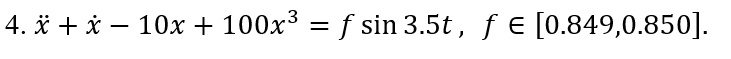

In [99]:
#%matplotlib widget

import os

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from matplotlib.widgets   import Slider, Button

def graph(x_plot, x_dot_plot, xlabel="", ylabel="", title="", xlim=(-5, 5), ylim=(-2.5, 2.5), scatter=True):
    fig, ax = plt.subplots(figsize=(10, 5))
    plt.grid()

   # plt.xlim(xlim[0], xlim[1])
    #plt.ylim(ylim[0], ylim[1])
    
    if scatter:
        ax.scatter(x_plot, x_dot_plot, color="blue", linewidths=0, marker=".", s=5)
    else:
        ax.plot(x_plot, x_dot_plot, color="blue")

    plt.title(title, fontsize=10)
    plt.show()

def poincare_section(t_plot, x_plot, x_dot_plot, T):
    
    indexes = np.where(t_plot % T == 0)[0] 
    
    x_plot     = [x_plot[index]     for index in indexes]
    x_dot_plot = [x_dot_plot[index] for index in indexes]
    
    return x_plot, x_dot_plot

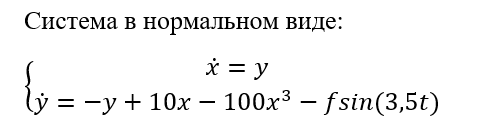

In [100]:
# правая часть ДУ, разрешимого относительно старшей производной 
def F(*args):
    return (-args[2]+10*args[1]-100*(args[1]**3 + args[3]*np.sin(3.5*args[0])))

# начальные условия для ДУ
u_0     = 0
u_der_0 = 0

# период
T = round(2 * np.pi * 10 / 3.5)   # ~ 63

# шаг сетки
h = 0.01

# интервал
a = 0
b = 10000

# метод Рунге-Кутта (~O(h^4))
def Runge_Kutta_method(t_plot, F, *args):
    
    h = t_plot[1] - t_plot[0]
    
    u_0 = args[0]
    w_0 = args[1]
    
    u_plot = [u_0]
    w_plot = [w_0]
    
    for i in range(len(t_plot) - 1):
        k1_w = F(t_plot[i], u_plot[i], w_plot[i], args[2])
        k1_u = w_plot[i]
        
        k2_w = F(t_plot[i] + h / 2, u_plot[i] + h / 2 * k1_u, w_plot[i] + h / 2 * k1_w, args[2])
        k2_u = w_plot[i] + h / 2 * k1_w
        
        k3_w = F(t_plot[i] + h / 2, u_plot[i] + h / 2 * k2_u, w_plot[i] + h / 2 * k2_w, args[2])
        k3_u = w_plot[i] + h /2 * k2_w
        
        k4_w = F(t_plot[i] + h, u_plot[i] + h * k3_u, w_plot[i] + h * k3_w, args[2])
        k4_u = w_plot[i] + h * k3_w
        
        w = w_plot[i] + h / 6 * (k1_w + 2 * (k2_w + k3_w) + k4_w)
        u = u_plot[i] + h / 6 * (k1_u + 2 * (k2_u + k3_u) + k4_u)
        
        w_plot.append(w)
        u_plot.append(u)
    
    return u_plot, w_plot

# построение сетки
t_plot = np.linspace(a, b, round((b - a) / h) + 1)

# **1. Параметр f = 0.850**

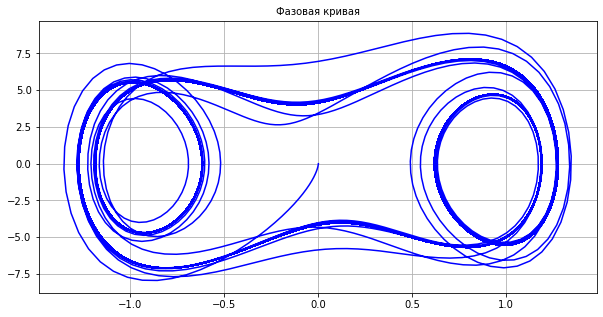

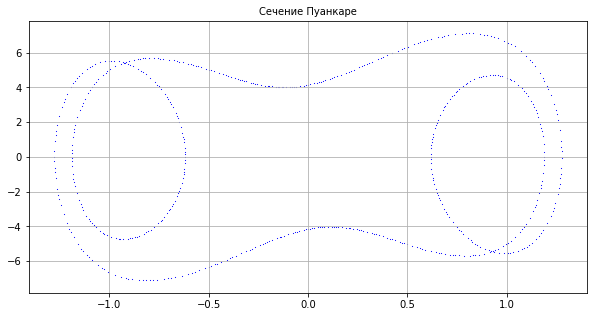

In [101]:
f = 0.850
x_plot,  x_dot_plot  = Runge_Kutta_method(t_plot, F, u_0, u_der_0, f)
x_plot1, x_dot_plot1 = poincare_section(t_plot, x_plot, x_dot_plot, T)

graph(x_plot, x_dot_plot, 
      xlabel="x", ylabel="y", title="Фазовая кривая", xlim=(-0.5, 0.5), ylim=(-0.5, 0.5), scatter=False)

graph(x_plot1, x_dot_plot1, title="Сечение Пуанкаре", xlim=(-0.5, 0.5), ylim=(-0.5, 0.5))

# **2. Параметр f = 0.849**

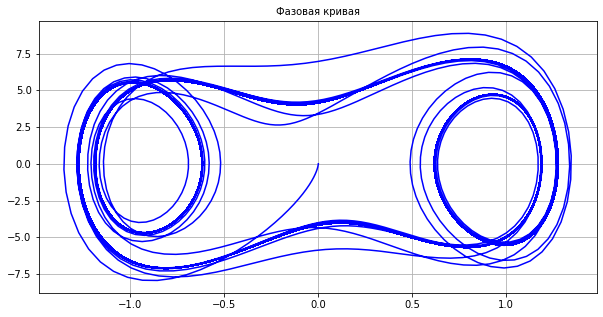

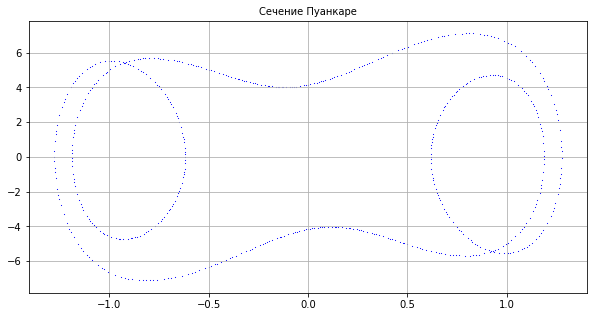

In [102]:
f = 0.849
x_plot,  x_dot_plot  = Runge_Kutta_method(t_plot, F, u_0, u_der_0, f)
x_plot1, x_dot_plot1 = poincare_section(t_plot, x_plot, x_dot_plot, T)

graph(x_plot, x_dot_plot, 
      xlabel="x", ylabel="y", title="Фазовая кривая", xlim=(-0.5, 0.5), ylim=(-0.5, 0.5), scatter=False)

graph(x_plot1, x_dot_plot1, title="Сечение Пуанкаре", xlim=(-0.5, 0.5), ylim=(-0.5, 0.5))

# **3. Параметр f = 0.8495**

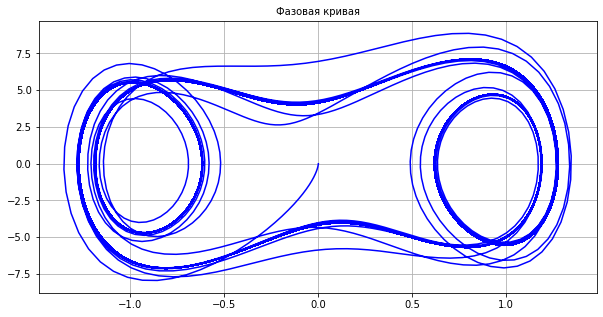

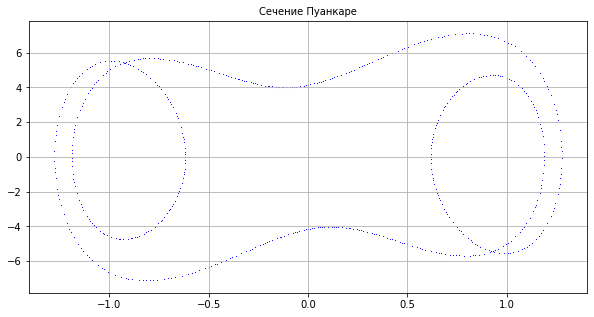

In [103]:
f = 0.8495
x_plot,  x_dot_plot  = Runge_Kutta_method(t_plot, F, u_0, u_der_0, f)
x_plot1, x_dot_plot1 = poincare_section(t_plot, x_plot, x_dot_plot, T)

graph(x_plot, x_dot_plot, 
      xlabel="x", ylabel="y", title="Фазовая кривая", xlim=(-0.5, 0.5), ylim=(-0.5, 0.5), scatter=False)

graph(x_plot1, x_dot_plot1, title="Сечение Пуанкаре", xlim=(-0.5, 0.5), ylim=(-0.5, 0.5))

# **Сценарий перехода к хаосу:**

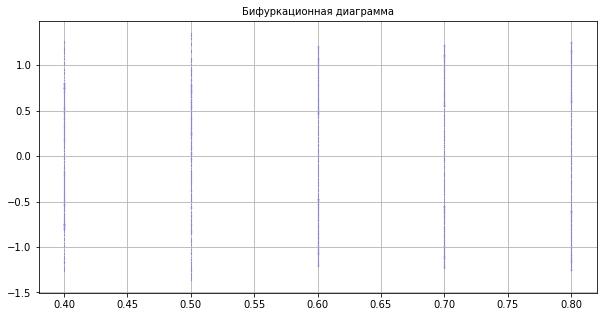

In [94]:
X_plot = []
f_plot = []

for f in np.arange(0.4, 0.9, 0.1):
    x_plot, x_dot_plot = Runge_Kutta_method(t_plot, F, u_0, u_der_0, f)
    x_plot1, _ = poincare_section(t_plot, x_plot, x_dot_plot, T)
    
    f_plot.append([f for _ in range(len(x_plot1))])
    X_plot.append(x_plot1)

graph(f_plot, X_plot, 
      xlabel="f", ylabel="x",  title="Бифуркационная диаграмма")

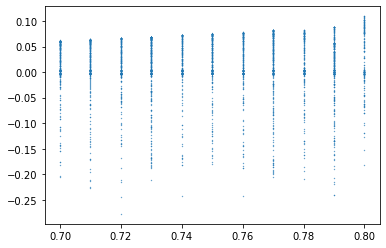

In [105]:
!pip install pydyns

import pydyns as dyns


x,y = [], []
for p in np.arange(0.7, 0.8, 0.01):
  dynamic_system = dyns.DynamicSystem([0.1,0.1], ["y",f"-y+10*x-100*x*x*x+{p}*sin(3.5*t)"], 'x,y')
  dynamic_system.SetDt(0.01)
  trajectory = dynamic_system.GetTrajectory(100)

  y_=dyns.GetBifurcationMap(trajectory)
  y+=y_
  x+=[p for _ in range(len(y_))]

plt.scatter(x,y,s=0.1)
